# Projeto - Análise das UPP,  Evolução Mensal no Rio de Janeiro (Analytica UFRJ)

* Base de dados:
    * Estatísticas de segurança: série histórica mensal por área de Unidade de Polícia Pacificadora (01/2007 a 06/2020)
    * [ISP - Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html)
    * [Base dos Dados](https://basedosdados.org/dataset/estatisticas-de-seguranca-por-delegacia-de-policia-rj)


* Sumário
    * Introdução ao Problema
    * Questionamentos iniciais
        * A UPP melhorou os índices de seguranças nesses locais?
        * Em caso de melhora ou piora, quais foram os locais que tiveram numeros expressivos?
        * Quais UPP's foram casos de sucesso e quais foram casos de fracasso?
    * Macro
        * Análise histórica dos dados brutos
        * Análise histórica roubo, furto, hom_doloso, armas_apreendidas
    * Meso
        * Análise histórica dos dados brutos por Zona
        * Análise histórica dos dados de roubo, furto, hom_doloso, armas_apreendidas por Zona
    * Micro
        * Quais UPP's tiveram os maiores e menores números absolutos de criminalidade?
        * Quais UPP's tiveram uma evolução para melhor e pior nos números absolutos de criminalidade?
        * Quais UPP's tiveram uma evolução para melhor e pior nos números de roubo, furto, hom_doloso, armas_apreendidas?
    * Predições
        * Clusterização dos dados de roubo e furto
        * Clusterização dos dados de roubo de carga
    * Dashboard Interativo
        * Geração de relatórios automáticos utilizando fatores para filtragem dos dados


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
base = pd.read_csv('UppEvolucaoMensalDeTitulos.csv', sep=';',encoding='ISO-8859-1')

In [3]:
base.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

In [4]:
base.sample(10)

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
5989,24,Chatuba,2020,2,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,12
692,9,Formiga,2008,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
3672,25,Fé / Sereno,2015,1,0,0,0,0,0,3,...,0,0,2,0,1,0,0,0,0,10
5789,14,Coroa / Fallet / Fogueteiro,2019,9,0,0,0,1,0,1,...,1,0,0,4,0,0,0,0,0,15
2154,27,Vila Cruzeiro,2011,9,0,0,0,0,0,9,...,0,2,2,4,1,0,0,0,0,30
1682,11,Salgueiro,2010,9,0,0,0,0,0,2,...,0,0,1,2,1,0,0,0,0,28
5276,33,Cerro-Corá,2018,7,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,2
4111,8,Borel,2016,1,0,0,0,0,10,7,...,0,0,5,5,1,1,0,0,0,32
2285,6,Tabajaras,2012,1,0,0,0,0,0,8,...,1,0,1,5,0,0,0,0,0,22
4262,7,Providência,2016,5,0,0,0,3,6,3,...,14,1,14,3,0,0,0,0,0,34


In [5]:
base.shape

(6384, 42)

In [6]:
base.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

### Criação da Coluna Ocorrência_AR e Ocorrência_BR

* Ocorrência_BR - Ocorrências de baixo risco: Som alto, briga entre pessoas e etc
* Ocorrência_AR - Ocorrências de alto risco: Roubo, tráfico, morte e etc.

In [7]:
base['ocorrencia_ar'] = base.transpose().drop('cod_upp').drop('upp').drop('ano').drop('mes').drop('registro_ocorrencias').sum()
base.rename(columns = {'registro_ocorrencias': 'ocorrencia_br' } , inplace = True)
base.astype({'ocorrencia_ar':'int64'})

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,ocorrencia_br,ocorrencia_ar
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,11,8
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,2,11,7,2,0,0,0,0,98,136
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,19,27
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,2,0,1,0,0,0,0,0,9,8
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,1,1,0,0,0,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,34,Arará / Mandela,2020,12,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,9,9
6380,35,Lins,2020,12,0,0,0,0,0,2,...,0,0,3,0,0,0,0,0,23,17
6381,36,Camarista Méier,2020,12,0,0,0,0,1,2,...,0,0,1,2,0,0,0,0,32,24
6382,37,Mangueirinha,2020,12,1,0,0,0,0,5,...,1,1,4,0,0,0,0,0,43,45


In [8]:
base

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,ocorrencia_br,ocorrencia_ar
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,11,8
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,2,11,7,2,0,0,0,0,98,136
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,19,27
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,2,0,1,0,0,0,0,0,9,8
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,1,1,0,0,0,0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,34,Arará / Mandela,2020,12,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,9,9
6380,35,Lins,2020,12,0,0,0,0,0,2,...,0,0,3,0,0,0,0,0,23,17
6381,36,Camarista Méier,2020,12,0,0,0,0,1,2,...,0,0,1,2,0,0,0,0,32,24
6382,37,Mangueirinha,2020,12,1,0,0,0,0,5,...,1,1,4,0,0,0,0,0,43,45


# Análise Macro

* Análise histórica dos dados brutos
* Análise histórica roubo, furto, hom_doloso, armas_apreendidas e ameças.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Análise histórica de Roubo, Furto, Homicídio Doloso, Armas Apreendidas e Ameaças.

In [10]:
sns.set_theme(style='whitegrid')
sns.set_palette("Dark2_r")

In [11]:
ocorrenciasar = base.groupby('ano')['ocorrencia_ar'].sum()
ocorrenciasbr = base.groupby('ano')['ocorrencia_br'].sum()
total_roubos = base.groupby('ano')['total_roubos'].sum()
total_furtos = base.groupby('ano')['total_furtos'].sum()
armas_apreendidas = base.groupby('ano')['armas_apreendidas'].sum()
ameaca = base.groupby('ano')['ameaca'].sum()
hom_doloso = base.groupby('ano')['hom_doloso'].sum()
ano = base['ano'].unique()

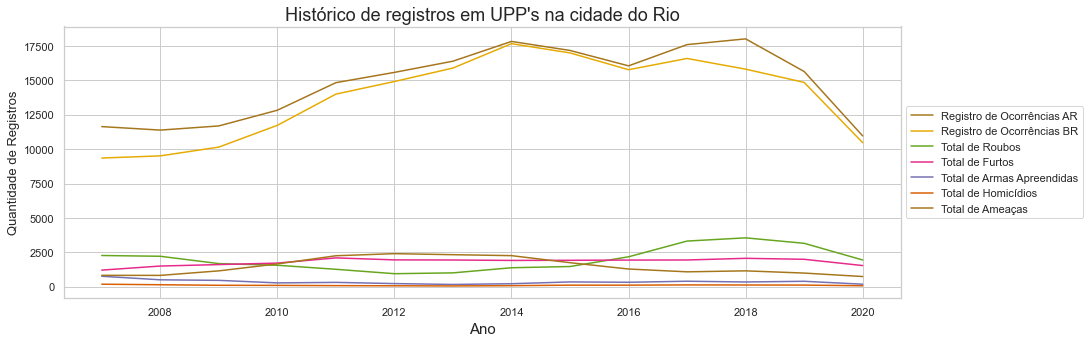

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
title = "Histórico de registros em UPP's na cidade do Rio"
ax.set_title(title, fontsize = 18)
ax.plot(ano, ocorrenciasar, label = 'Registro de Ocorrências AR')
ax.plot(ano, ocorrenciasbr, label = 'Registro de Ocorrências BR')
ax.plot(ano, total_roubos, label = 'Total de Roubos')
ax.plot(ano, total_furtos, label = 'Total de Furtos')
ax.plot(ano, armas_apreendidas, label = 'Total de Armas Apreendidas')
ax.plot(ano, hom_doloso, label = 'Total de Homicídios')
ax.plot(ano, ameaca, label = 'Total de Ameaças')
ax.set_ylabel('Quantidade de Registros', fontsize = 13)
ax.set_xlabel('Ano', fontsize = 15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

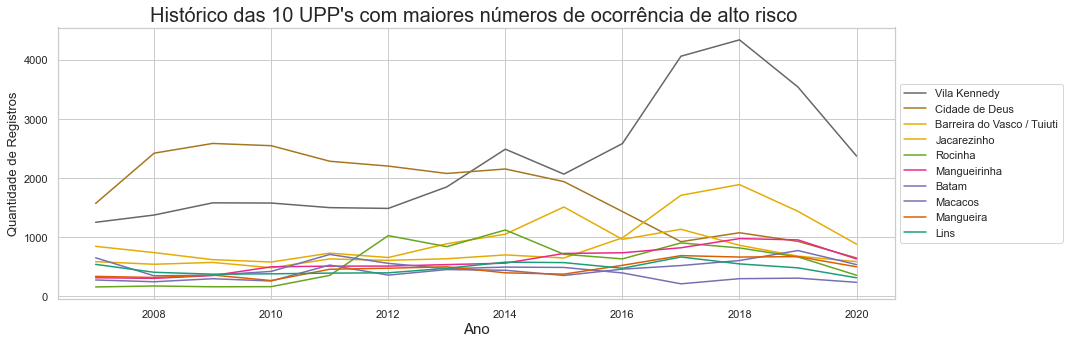

In [13]:
list_upps_maiores_ocorrencias = base.groupby('upp')['ocorrencia_ar'].sum().sort_values(ascending = False).index[:10].to_list()
upp_ano_ocorrencia = pd.DataFrame(base[base['upp'].isin(list_upps_maiores_ocorrencias)].groupby(['ano', 'upp'])['ocorrencia_ar'].sum()).reset_index().sort_values(by='ocorrencia_ar', ascending = False)
upp_ano_ocorrencia

#####

plt.figure(figsize=(15, 5))
plt.title("Histórico das 10 UPP's com maiores números de ocorrência de alto risco ", fontsize = (20), loc='center')
g = sns.lineplot(x='ano', y='ocorrencia_ar', hue='upp' , data = upp_ano_ocorrencia, palette='Dark2_r')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_ylabel('Quantidade de Registros',fontsize = 13)
g.set_xlabel('Ano', fontsize = 15);

### Médias de Ocorrências de Alto Risco e Baixo Risco por ano

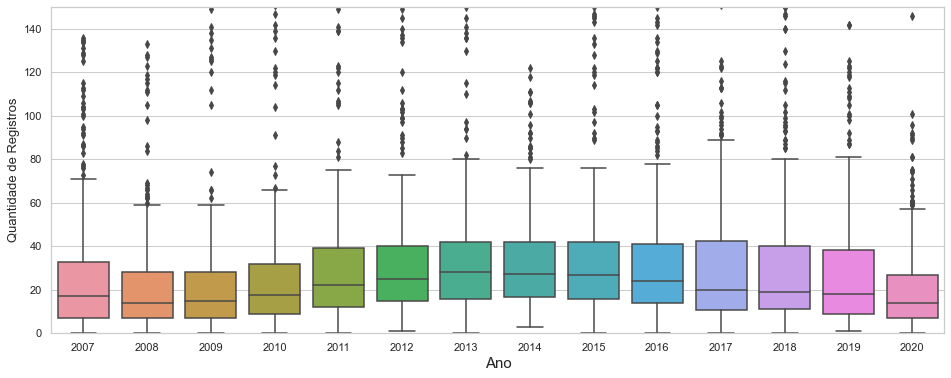

In [14]:
plt.figure(figsize=(16, 6))
plt.ylim(top=150)
g = sns.boxplot(x="ano", y="ocorrencia_ar",data=base)
g.set_ylabel('Quantidade de Registros', fontsize = 13)
g.set_xlabel('Ano', fontsize = 15);

# Análise Meso - Ocorrências por Localidade

In [15]:
base_zona = pd.read_excel('base_zona.xlsx')
base_zona

,upp,zona,lat,lon
0,Santa Marta,Zona Sul,-22.950304,-43.192400
1,Cidade de Deus,Zona Oeste,-22.948030,-43.362903
2,Batam,Zona Oeste,-22.862929,-43.426209
3,Chapéu Mangueira / Babilônia,Zona Sul,-22.960557,-43.170587
4,Pavão-Pavãozinho,Zona Sul,-22.979729,-43.192846
5,Tabajaras,Zona Sul,-22.962906,-43.190375
6,Providência,Centro,-22.897510,-43.196716
7,Borel,Zona Norte,-22.937497,-43.254826
8,Formiga,Zona Norte,-22.941502,-43.241470
9,Andaraí,Zona Norte,-22.929084,-43.253486


In [16]:
Zonas = {'Santa Marta':'Zona Sul',
 'Cidade de Deus':'Zona Oeste',
 'Batam':'Zona Oeste',
 'Chapéu Mangueira / Babilônia':'Zona Sul',
 'Pavão-Pavãozinho':'Zona Sul',
 'Tabajaras':'Zona Sul',
 'Providência':'Centro',
 'Borel':'Zona Norte',
 'Formiga':'Zona Norte',
 'Andaraí':'Zona Norte',
 'Salgueiro':'Zona Norte',
 'Turano':'Zona Norte',
 'São João / Matriz / Queto':'Zona Norte',
 'Coroa / Fallet / Fogueteiro':'Zona Sul',
 'Escondidinho / Prazeres':'Zona Sul',
 'São Carlos':'Centro',
 'Mangueira':'Zona Norte',
 'Macacos':'Zona Norte',
 'Vidigal':'Zona Sul',
 'Nova Brasília':'Zona Norte',
 'Fazendinha':'Zona Norte',
 'Adeus / Baiana':'Zona Norte',
 'Alemão':'Zona Norte',
 'Chatuba':'Zona Norte',
 'Fé / Sereno':'Zona Norte',
 'Parque Proletário':'Zona Norte',
 'Vila Cruzeiro':'Zona Norte',
 'Rocinha':'Zona Sul',
 'Jacarezinho':'Zona Norte',
 'Manguinhos':'Zona Norte',
 'Barreira do Vasco / Tuiuti':'Zona Norte',
 'Caju':'Zona Norte',
 'Cerro-Corá':'Zona Sul',
 'Arará / Mandela':'Zona Norte',
 'Lins':'Zona Norte',
 'Camarista Méier':'Zona Norte',
 'Mangueirinha':'Baixada',
 'Vila Kennedy':'Zona Oeste'}

In [17]:
base = pd.merge(base, base_zona ,how='inner', on = 'upp')

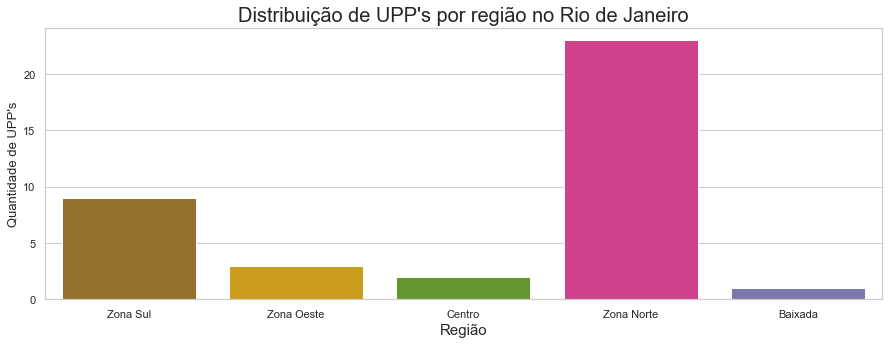

In [18]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição de UPP's por região no Rio de Janeiro", fontsize = (20), loc='center')
g = sns.countplot(x='zona' , data=base_zona)
g.set_ylabel("Quantidade de UPP's",fontsize = 13)
g.set_xlabel('Região', fontsize = 15);

In [19]:
base_zona['zona'].value_counts()

Zona Norte    23
Zona Sul       9
Zona Oeste     3
Centro         2
Baixada        1
Name: zona, dtype: int64

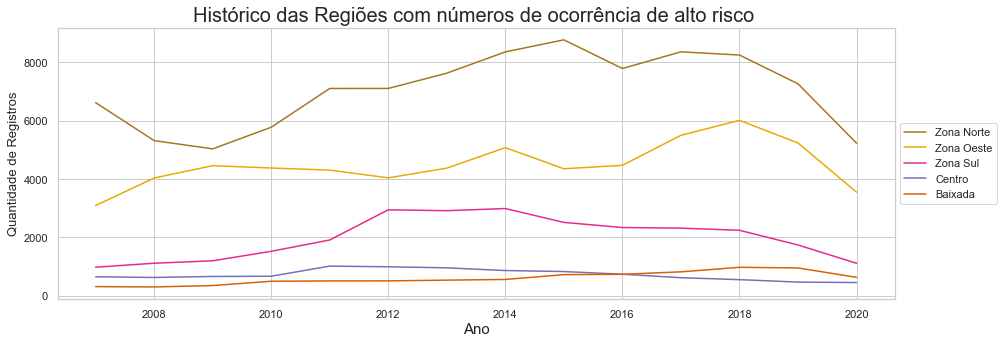

In [20]:
list_upps_maiores_ocorrencias = base.groupby('zona')['ocorrencia_ar'].sum().sort_values(ascending = False).index[:10].to_list()
upp_ano_ocorrencia = pd.DataFrame(base[base['zona'].isin(list_upps_maiores_ocorrencias)].groupby(['ano', 'zona'])['ocorrencia_ar'].sum()).reset_index().sort_values(by='ocorrencia_ar', ascending = False)
upp_ano_ocorrencia

#####

plt.figure(figsize=(15, 5))
plt.title("Histórico das Regiões com números de ocorrência de alto risco ", fontsize = (20), loc='center')
g = sns.lineplot(x='ano', y='ocorrencia_ar', hue='zona' , data = upp_ano_ocorrencia, palette='Dark2_r')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_ylabel('Quantidade de Registros',fontsize = 13)
g.set_xlabel('Ano', fontsize = 15);

# Clusterização por bairros

In [21]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

In [22]:
map_rio = folium.Map(location=[-22.8956799, -43.3929967], zoom_start=11)
for lat, lng, label in zip(base_zona.lat, base_zona.lon, base_zona.upp):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=2.5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rio)
map_rio

# Projetar os dados os locais de UPP no mapa

In [23]:
map_rio = folium.Map(location=[-22.8956799, -43.3929967], zoom_start=11)
HeatMap(list(zip(base_zona.lat, base_zona.lon))).add_to(map_rio)
map_rio

In [24]:
from sklearn.cluster import KMeans

In [25]:
number_of_clusters = 7

good_xys = base_zona[['lat', 'lon']].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

map_rio = folium.Map(location=[-22.8956799, -43.3929967], zoom_start=11)
HeatMap(list(zip(base_zona.lat, base_zona.lon))).add_to(map_rio)
for coord in kmeans.cluster_centers_:
    folium.Circle([coord[0], coord[1]], radius=3000, color='green', fill=True).add_to(map_rio)
    folium.Marker([coord[0], coord[1]]).add_to(map_rio)
    
map_rio

# Clusterizando Locais com alto AR no Mapa

In [26]:
base_upp_ano = pd.DataFrame(base.groupby(['upp', 'ano'])['ocorrencia_ar'].sum()).reset_index()
base_upp_ano = base_upp_ano[base_upp_ano['ano'] >= 2015]
base_upp_ano = pd.merge(base_upp_ano, base_zona ,how='inner', on = 'upp').drop('zona', axis = 1)
base_upp_ano

,upp,ano,ocorrencia_ar,lat,lon
0,Adeus / Baiana,2015,310,-22.864838,-43.260936
1,Adeus / Baiana,2016,429,-22.864838,-43.260936
2,Adeus / Baiana,2017,470,-22.864838,-43.260936
3,Adeus / Baiana,2018,491,-22.864838,-43.260936
4,Adeus / Baiana,2019,359,-22.864838,-43.260936
...,...,...,...,...,...
223,Vila Kennedy,2016,2581,-22.855678,-43.490030
224,Vila Kennedy,2017,4059,-22.855678,-43.490030
225,Vila Kennedy,2018,4336,-22.855678,-43.490030
226,Vila Kennedy,2019,3537,-22.855678,-43.490030


In [27]:
map_rio = folium.Map(location=[-22.8956799, -43.3929967], zoom_start=11)
HeatMap(list(zip(base_upp_ano.lat, base_upp_ano.lon, base_upp_ano.ocorrencia_ar))).add_to(map_rio)    
map_rio

In [28]:
base_upp_ano

,upp,ano,ocorrencia_ar,lat,lon
0,Adeus / Baiana,2015,310,-22.864838,-43.260936
1,Adeus / Baiana,2016,429,-22.864838,-43.260936
2,Adeus / Baiana,2017,470,-22.864838,-43.260936
3,Adeus / Baiana,2018,491,-22.864838,-43.260936
4,Adeus / Baiana,2019,359,-22.864838,-43.260936
...,...,...,...,...,...
223,Vila Kennedy,2016,2581,-22.855678,-43.490030
224,Vila Kennedy,2017,4059,-22.855678,-43.490030
225,Vila Kennedy,2018,4336,-22.855678,-43.490030
226,Vila Kennedy,2019,3537,-22.855678,-43.490030


In [29]:
kmeans = KMeans(n_clusters=6)

weighted_kmeans_clusters = kmeans.fit(base_upp_ano[['lat' , 'lon']], sample_weight = base_upp_ano['ocorrencia_ar'])
base_upp_ano['cluster_label'] = kmeans.predict(base_upp_ano[['lat' , 'lon']], sample_weight = base_upp_ano['ocorrencia_ar'])
centers = kmeans.cluster_centers_ 

In [30]:
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'orange'}
base_upp_ano['cluster_label'].replace(colors, inplace = True)

In [31]:
map_rio = folium.Map(location=[-22.8956799, -43.3929967], zoom_start=11)
for coord in centers:
    folium.Marker([coord[0], coord[1]]).add_to(map_rio)
    folium.Circle([coord[0], coord[1]],radius=5500, color='white', fill=True, fill_opacity=0.4).add_to(map_rio)

    
for res in base_upp_ano.values:
    lat = res[3]; lon = res[4]
    color = res[5]
    label = folium.Popup(res[0])
    folium.Circle([lat, lon], radius=1000, color=color, fill=True,fill_opacity=0.1, popup=label).add_to(map_rio)
map_rio